In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("train_Titanic.csv")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
df.shape  

(891, 12)

In [63]:
df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [64]:
def f(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [65]:
def g(tt):
    if tt in ['Mr']:
        return 1
    elif tt in ['Master']:
        return 3
    elif tt in ['Ms', 'Mlle', 'Miss']:
        return 4
    elif tt in ['Mrs','Mme']:
        return 5
    else:
        return 2

In [66]:
df['title'] = df['Name'].apply(f).apply(g)
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,5
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,4
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,5
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [67]:
t = pd.crosstab(df['title'], df['Survived'])
t

Survived,0,1
title,,
1,436,81
2,15,8
3,17,23
4,55,130
5,26,100


In [68]:
t_pct = t.div(t.sum(1).astype(float), axis=0)
t_pct

Survived,0,1
title,,
1,0.843327,0.156673
2,0.652174,0.347826
3,0.425000,0.575000
4,0.297297,0.702703
5,0.206349,0.793651


Text(0, 0.5, 'Survival Rate')

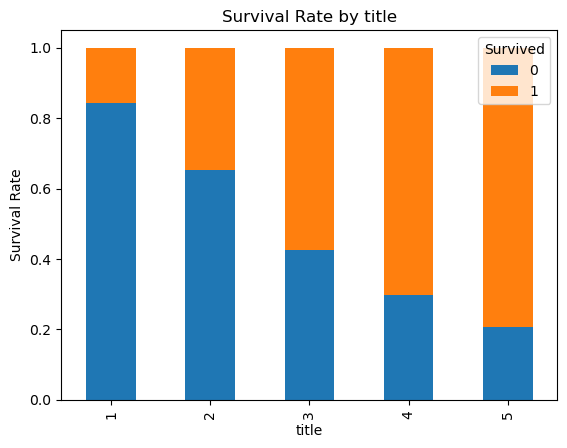

In [69]:
t_pct.plot(kind='bar',stacked=True, title='Survival Rate by title')

plt.xlabel('title')

plt.ylabel('Survival Rate')

In [70]:
# drop unnecessary columns

In [71]:
df = df.drop(['PassengerId','Name','Ticket'], axis=1)   
df.head()
dfall = df

In [72]:
# Embarked
# get_dummies: Convert categorical variable into dummy/indicator variables
edt  = pd.get_dummies(df['Embarked'])
edt

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [73]:
#edt
edt.drop(['S'], axis=1, inplace=True)

In [74]:
df = df.join(edt)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,title,C,Q
0,3,male,22.0,1,0,7.2500,NaN,S,0,1,False,False
1,1,female,38.0,1,0,71.2833,C85,C,1,5,True,False
2,3,female,26.0,0,0,7.9250,NaN,S,1,4,False,False
3,1,female,35.0,1,0,53.1000,C123,S,1,5,False,False
4,3,male,35.0,0,0,8.0500,NaN,S,0,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0,2,False,False
887,1,female,19.0,0,0,30.0000,B42,S,1,4,False,False
888,3,female,NaN,1,2,23.4500,NaN,S,0,4,False,False
889,1,male,26.0,0,0,30.0000,C148,C,1,1,True,False


In [75]:
df.drop(['Embarked'], axis=1,inplace=True)
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,title,C,Q
0,3,male,22.0,1,0,7.2500,NaN,0,1,False,False
1,1,female,38.0,1,0,71.2833,C85,1,5,True,False
2,3,female,26.0,0,0,7.9250,NaN,1,4,False,False


In [76]:
#example groupby

In [77]:
df = pd.DataFrame({'Bird' : ['A', 'A', 'B', 'B', 'B'],'Speed' : [380, 370, 24, 26,np.nan]})
df

,Bird,Speed
0,A,380.0
1,A,370.0
2,B,24.0
3,B,26.0
4,B,NaN


In [78]:
df.groupby(['Bird']).mean()

,Speed
Bird,
A,375.0
B,25.0


In [79]:
df['Speed'] = df.groupby(['Bird'])['Speed'].transform(lambda x: x.fillna(x.mean()))
df

,Bird,Speed
0,A,380.0
1,A,370.0
2,B,24.0
3,B,26.0
4,B,25.0


In [80]:
# Age impute
print(dfall.columns)


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Survived', 'title'],
      dtype='object')


In [81]:
dfall['Age'] = dfall.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [82]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
dfall.drop("Cabin",axis=1,inplace=True)

In [83]:
##sexes
s = sorted(dfall['Sex'].unique())
s     

['female', 'male']

In [84]:
gm = dict(zip(s, range(0, len(s) + 1)))
gm

{'female': 0, 'male': 1}

In [86]:
dfall['Sex'].head(5)

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [88]:
dfall['Sex'] = dfall['Sex'].map(gm).astype(int)
dfall['Sex'].head(5)

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32